In [2]:
import json

def load_english_dictionary(filename):
    with open(filename) as json_data:
        dict = json.load(json_data)
    
    return dict

def load_textfile(filename):
    file = open(filename,"r") 
    text = file.read() 
    non_alpha_chars = [" ",".",",","-","—","\"","\n","'", \
                       ":",";","?","!","@","#","$","%","&","*"]
    for char in non_alpha_chars:
        text = text.replace(char,"")
    text = text.lower()
 
    return text


text = load_textfile("sidd.txt")
dict = load_english_dictionary("words_dictionary.json")

print('The text is {} chars long.'.format(len(text)))
print('The dictionary is {} words long.'.format(len(dict)))

The text is 927 chars long.
The dictionary is 3847 words long.


In [3]:
text = text.reverse()

AttributeError: 'str' object has no attribute 'reverse'

In [3]:
import math
import time

found_words = {}
round_times = []

def reverse_string(text):
    return text[::-1]

def one_pass(text, found_words, round_times, isReversed):

    MIN_WORD_LENGTH = 3
    START_ALGO_AT_X_LETTERS_APART = 2
    MAX_FOUND_WORD_LENGTH = 20

    found_words = {}

    for stride in range(START_ALGO_AT_X_LETTERS_APART,math.floor(len(text)/MIN_WORD_LENGTH)): 
        t = time.time()    

        for every_other_arr_start_idx in range(0,stride):       
            arr = text[every_other_arr_start_idx::stride] # save the every x other
            for start_idx in range(0,len(arr)):

                for end_idx in range((start_idx+1),min((start_idx+MAX_FOUND_WORD_LENGTH),len(arr)+1)):
                    word = arr[start_idx:end_idx]
                    if word in dict:
                        if len(word)>=MIN_WORD_LENGTH:
                            #                        
                            word_positions = [(start_idx*stride)+every_other_arr_start_idx,\
                                              ((end_idx-1)*stride)+every_other_arr_start_idx,\
                                              stride]
                            if isReversed: # NOTE: NOT TESTED :)
                                word_positions[0] = len(text)-1-word_positions[0]
                                word_positions[1] = len(text)-1-word_positions[1]
                                
                            if word in found_words:
                                found_words[word].append([word_positions])
                            else:
                                found_words[word] = [[word_positions]]
                            #print('{} : {},{},    {}'.format(word,stride,start_idx,word_positions))

        elapsed = time.time() - t
        round_times.append(elapsed)
        #print('Round {} : {:.2f}s'.format(stride,elapsed))
        
    return found_words, round_times

total_time = time.time()
found_words, round_times = one_pass(text, found_words, round_times)                  #forward pass
found_words, round_times = one_pass(reverse_string(text), found_words, round_times)  #reverse pass
        
total_elapsed = time.time() - total_time
print('Total elapsed time : {:.2f}s'.format(total_elapsed))



Round 2 : 1.21s
Round 3 : 1.18s
Round 4 : 1.26s
Round 5 : 1.27s
Round 6 : 1.23s
Round 7 : 1.21s
Round 8 : 1.23s
Round 9 : 1.19s
Round 10 : 1.17s
Round 11 : 1.14s
Round 12 : 1.05s
Round 13 : 1.06s
Round 14 : 1.07s
Round 15 : 1.03s
Round 16 : 1.03s
Round 17 : 1.03s
Round 18 : 0.99s
Round 19 : 0.98s
Round 20 : 0.97s
Round 21 : 0.96s
Round 22 : 0.95s
Round 23 : 0.95s
Round 24 : 0.93s
Round 25 : 0.92s
Round 26 : 0.91s
Round 27 : 0.89s
Round 28 : 0.89s
Round 29 : 0.87s
Round 30 : 0.86s
Round 31 : 0.84s
Round 32 : 0.83s
Round 33 : 0.83s
Round 34 : 0.81s
Round 35 : 0.79s
Round 36 : 0.78s
Round 37 : 0.78s
Round 38 : 0.77s
Round 39 : 0.76s
Round 40 : 0.75s
Round 41 : 0.75s
Round 42 : 0.72s
Round 43 : 0.74s
Round 44 : 0.70s
Round 45 : 0.69s
Round 46 : 0.68s
Round 47 : 0.66s
Round 48 : 0.65s
Round 49 : 0.64s
Round 50 : 0.63s
Round 51 : 0.61s
Round 52 : 0.60s
Round 53 : 0.61s
Round 54 : 0.59s
Round 55 : 0.60s
Round 56 : 0.67s
Round 57 : 0.56s
Round 58 : 0.58s
Round 59 : 0.54s
Round 60 : 0.53s
Round

In [4]:
print('# Distinct words found : {}'.format(len(found_words)))
#print('# Distinct non-words found : {}'.format(len(non_words)))

# Distinct words found : 509


NameError: name 'non_words' is not defined

In [5]:
import pandas as pd

stats = []
found_words_list = []
word_length = []
for word in found_words:
    stats.append( len(found_words[word]) )
    found_words_list.append( word )
    word_length.append( len(word) )
 
    #print('{} {}'.format(len(found_words[word]),word))
    
d = {'num_found': stats, 'word': found_words_list, 'word_length' : word_length}
df = pd.DataFrame(data=d)

In [6]:
df = df.sort_values(by='word_length',ascending=False)
df.head(10)

,num_found,word,word_length
398,1,waiter,6
361,1,spirit,6
215,1,estate,6
397,1,cancel,6
376,1,whole,5
221,1,raise,5
409,1,photo,5
206,1,rider,5
316,1,strip,5
315,1,slice,5


In [11]:
found_words['waiter']
text[801]

'r'

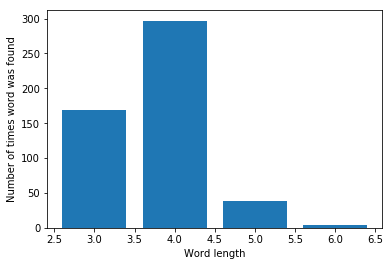

In [14]:
import matplotlib.pyplot as plt
import numpy as np

sum_words_with_same_length = []

max_word_length = max(df.word_length)
for i in range(3,max_word_length+1):
    sum_words_with_same_length.append(sum(df.word_length==i))
    
plt.bar(np.arange(3,max_word_length+1),sum_words_with_same_length)
plt.xlabel('Word length')
plt.ylabel('Number of times word was found')
plt.show()

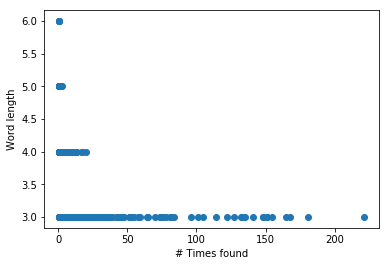

In [15]:
plt.scatter(df.num_found,df.word_length)
plt.xlabel('# Times found')
plt.ylabel('Word length')
plt.show()

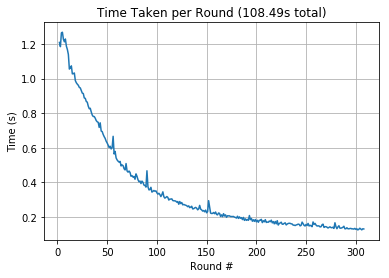

In [17]:
fig, ax = plt.subplots()
rounds = len(round_times)
ax.plot(range(2,2+rounds),round_times[:rounds])
ax.set(xlabel='Round #', ylabel='Time (s)',
       title='Time Taken per Round ({:.2f}s total)'.format(total_elapsed))
ax.grid()
plt.show()